In [1]:
import pandas as pd

# Carga del archivo de expresión original (el mismo usado en bulkmodel.py)
data = pd.read_csv("data/ALL_expression.csv", index_col=0)

# Extraer nombres de los genes (columnas)
gene_names = pd.DataFrame(data.columns)

# Guardar como CSV
gene_names.to_csv("/home/franciscojavier/Escritorio/TFG/scDEAL/save/GSE110894bulk_gene.csv")


Los genes más importantes (según Integrated Gradients) para predecir sensibilidad o resistencia al fármaco I-BET-762 en muestras bulk.


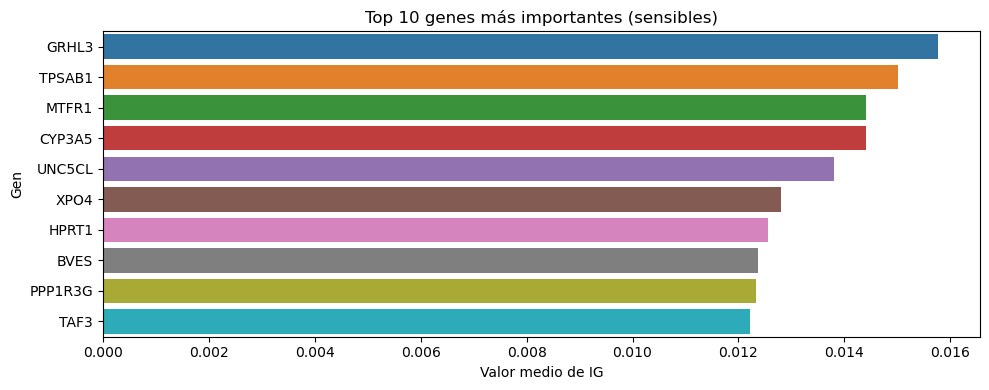

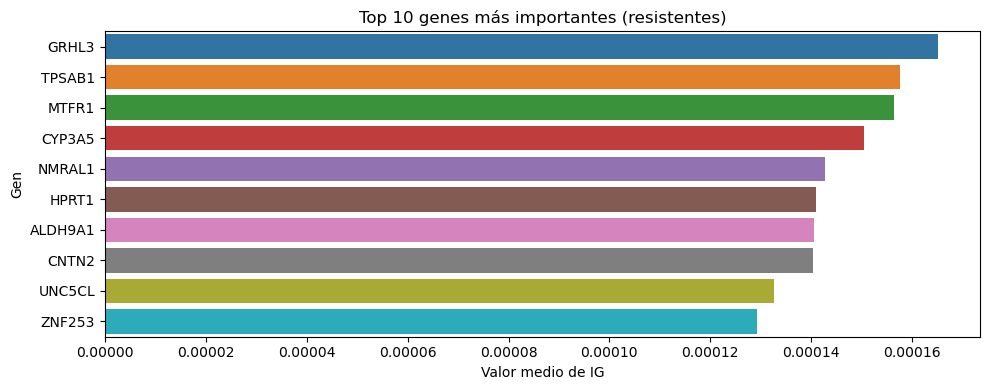

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Rutas a tus archivos locales
gradient_path = "/home/franciscojavier/Escritorio/TFG/scDEAL/save/GSE110894bulk_gradient.txt"
gene_path = "/home/franciscojavier/Escritorio/TFG/scDEAL/save/GSE110894bulk_gene.csv"
label_path = "/home/franciscojavier/Escritorio/TFG/scDEAL/save/GSE110894bulk_lab.csv"

# Leer datos
gradients = np.loadtxt(gradient_path)
gene_names = pd.read_csv(gene_path, index_col=0, header=None)[1].values[:gradients.shape[1]]
labels = pd.read_csv(label_path, index_col=0)
labels.columns = ["label"]

# Crear DataFrame con nombres de genes
gradients_df = pd.DataFrame(gradients, columns=gene_names)
gradients_df["label"] = labels["label"].values

# Separar por clase
sensitive = gradients_df[gradients_df["label"] == 1].drop("label", axis=1)
resistant = gradients_df[gradients_df["label"] == 0].drop("label", axis=1)

# Calcular medias
mean_sensitive = sensitive.mean().sort_values(ascending=False).head(10)
mean_resistant = resistant.mean().sort_values(ascending=False).head(10)

# Mostrar gráficamente
print("Los genes más importantes (según Integrated Gradients) para predecir sensibilidad o resistencia al fármaco I-BET-762 en muestras bulk.")
plt.figure(figsize=(10, 4))
sns.barplot(x=mean_sensitive.values, y=mean_sensitive.index)
plt.title("Top 10 genes más importantes (sensibles)")
plt.xlabel("Valor medio de IG")
plt.ylabel("Gen")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
sns.barplot(x=mean_resistant.values, y=mean_resistant.index)
plt.title("Top 10 genes más importantes (resistentes)")
plt.xlabel("Valor medio de IG")
plt.ylabel("Gen")
plt.tight_layout()
plt.show()
